In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
files={}
files['MS3']=R.TFile("data/MS3.root")

In [3]:
g={}
g['lyDT']=files['MS3'].Get("lyDTArray")
g['tau']=files['MS3'].Get("tau_pmt")

In [4]:
#missing Prod5
arrays={
    423:{'file':'data/tree_FirstRun003916_LastRun003943_ARRAY000423_THSCAN_SUMMARY.root','prod':1},
    495:{'file':'data/tree_FirstRun003946_LastRun003973_ARRAY000495_THSCAN_SUMMARY.root','prod':2},
    774:{'file':'data/tree_FirstRun003976_LastRun004003_ARRAY000774_THSCAN_SUMMARY.root','prod':3},
    721:{'file':'data/tree_FirstRun004006_LastRun004033_ARRAY000721_THSCAN_SUMMARY.root','prod':4},
    656:{'file':'data/tree_FirstRun004036_LastRun004063_ARRAY000656_THSCAN_SUMMARY.root','prod':6},
    445:{'file':'data/tree_FirstRun004066_LastRun004093_ARRAY000445_THSCAN_SUMMARY.root','prod':8},
    618:{'file':'data/tree_FirstRun004096_LastRun004123_ARRAY000618_THSCAN_SUMMARY.root','prod':9},
    474:{'file':'data/tree_FirstRun004126_LastRun004153_ARRAY000474_THSCAN_SUMMARY.root','prod':10}
}

arrays_naked={
    90412:{'file':'data/tree_FirstRun004413_LastRun004440_ARRAY090412_THSCAN_SUMMARY.root','prod':1},
    90502:{'file':'data/tree_FirstRun004443_LastRun004470_ARRAY090502_THSCAN_SUMMARY.root','prod':2},
    90592:{'file':'data/tree_FirstRun004473_LastRun004500_ARRAY090592_THSCAN_SUMMARY.root','prod':3},
    90711:{'file':'data/tree_FirstRun004503_LastRun004530_ARRAY090712_THSCAN_SUMMARY.root','prod':4},
    90533:{'file':'data/tree_FirstRun004533_LastRun004560_ARRAY090533_THSCAN_SUMMARY.root','prod':5},
    90442:{'file':'data/tree_FirstRun004563_LastRun004590_ARRAY090442_THSCAN_SUMMARY.root','prod':8},
    90622:{'file':'data/tree_FirstRun004593_LastRun004620_ARRAY090622_THSCAN_SUMMARY.root','prod':9},
    90482:{'file':'data/tree_FirstRun004623_LastRun004650_ARRAY090482_THSCAN_SUMMARY.root','prod':10}
}

arrays_noglue={
    796:{'file':'data/tree_FirstRun004875_LastRun004902_ARRAY000796_THSCAN_SUMMARY.root','prod':10},
    797:{'file':'data/tree_FirstRun004905_LastRun004932_ARRAY000797_THSCAN_SUMMARY.root ','prod':10},
}

In [5]:
g['SR']=R.TGraphErrors()
g['LYDT']=R.TGraphErrors()
g['sigmaTvsSR']=R.TGraphErrors()
g['SRvsLY']=R.TGraphErrors()
g['SRvsLYDT']=R.TGraphErrors()
for ia,ar in enumerate(arrays):
    files[ar]=R.TFile(arrays[ar]['file'])
    g['SR_%d'%ar]=files[ar].Get('DT_vs_bar')
    g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
    g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
    #missing prod7 in MS3
    if (arrays[ar]['prod']<6):
        dt=g['tau'].GetY()[(arrays[ar]['prod']-1)]
    else:
        dt=g['tau'].GetY()[(arrays[ar]['prod']-2)]
    sr=1./g['SR_%d'%ar].GetFunction('pol2').Derivative(120)*1000
    g['SR'].SetPoint(ia,arrays[ar]['prod'],sr)
    g['LYDT'].SetPoint(ia,arrays[ar]['prod'],R.TMath.Mean(10,g['LY_%d'%ar].GetY())*4700./75./dt)
    g['sigmaTvsSR'].SetPoint(ia,sr/220.,g['sigmaT_%d'%ar].GetY()[4]/130.)
    g['sigmaTvsSR'].SetPointError(ia,3/220.,g['sigmaT_%d'%ar].GetErrorY(4)/4/130.)
    g['SRvsLY'].SetPoint(ia,R.TMath.Mean(10,g['LY_%d'%ar].GetY())/75.,sr/220.)
    g['SRvsLY'].SetPointError(ia,R.TMath.RMS(10,g['LY_%d'%ar].GetY())/75.,1/220.)
    g['SRvsLYDT'].SetPoint(ia,R.TMath.Mean(10,g['LY_%d'%ar].GetY())/dt/1.9,sr/220.)
#    g['SRvsLYDT'].SetPointError(ia,R.TMath.RMS(10,g['LY_%d'%ar].GetY())/dt/1.9,1/200.)
    g['SRvsLYDT'].SetPointError(ia,R.TMath.Mean(10,g['LY_%d'%ar].GetY())/dt/1.9*0.03,sr/220.*0.03)

In [6]:
g['SR_naked']=R.TGraphErrors()
g['LYDT_naked']=R.TGraphErrors()
g['sigmaTvsSR_naked']=R.TGraphErrors()
g['SRvsLY_naked']=R.TGraphErrors()
g['SRvsLYDT_naked']=R.TGraphErrors()
for ia,ar in enumerate(arrays_naked):
    files[ar]=R.TFile(arrays_naked[ar]['file'])
    g['SR_naked_%d'%ar]=files[ar].Get('DT_vs_bar')
    g['sigmaT_naked_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
    g['LY_naked_%d'%ar]=files[ar].Get('LY_vs_bar')
    #missing prod7 in MS3
    if (arrays_naked[ar]['prod']<6):
        dt=g['tau'].GetY()[(arrays_naked[ar]['prod']-1)]
    else:
        dt=g['tau'].GetY()[(arrays_naked[ar]['prod']-2)]
    sr=1./g['SR_naked_%d'%ar].GetFunction('pol2').Derivative(120)*1000
    g['SR_naked'].SetPoint(ia,arrays_naked[ar]['prod'],sr)
    g['LYDT_naked'].SetPoint(ia,arrays_naked[ar]['prod'],R.TMath.Mean(10,g['LY_naked_%d'%ar].GetY())*4700./75./dt)
    g['sigmaTvsSR_naked'].SetPoint(ia,sr/220.,g['sigmaT_naked_%d'%ar].GetY()[4]/130.)
    g['sigmaTvsSR_naked'].SetPointError(ia,3/220.,g['sigmaT_naked_%d'%ar].GetErrorY(4)/4/130.)
    g['SRvsLY_naked'].SetPoint(ia,R.TMath.Mean(10,g['LY_naked_%d'%ar].GetY())/75.,sr/220.)
    g['SRvsLY_naked'].SetPointError(ia,R.TMath.RMS(10,g['LY_naked_%d'%ar].GetY())/75.,1/220.)
    g['SRvsLYDT_naked'].SetPoint(ia,R.TMath.Mean(10,g['LY_naked_%d'%ar].GetY())/dt/1.9,sr/220.)
#    g['SRvsLYDT'].SetPointError(ia,R.TMath.RMS(10,g['LY_%d'%ar].GetY())/dt/1.9,1/200.)
    g['SRvsLYDT_naked'].SetPointError(ia,R.TMath.Mean(10,g['LY_naked_%d'%ar].GetY())/dt/1.9*0.03,sr/220.*0.03)

In [7]:
g['SR_noglue']=R.TGraphErrors()
g['LYDT_noglue']=R.TGraphErrors()
g['sigmaTvsSR_noglue']=R.TGraphErrors()
g['SRvsLY_noglue']=R.TGraphErrors()
g['SRvsLYDT_noglue']=R.TGraphErrors()
for ia,ar in enumerate(arrays_noglue):
    files[ar]=R.TFile(arrays_noglue[ar]['file'])
    g['SR_noglue_%d'%ar]=files[ar].Get('DT_vs_bar')
    g['sigmaT_noglue_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
    g['LY_noglue_%d'%ar]=files[ar].Get('LY_vs_bar')
    #missing prod7 in MS3
    if (arrays_noglue[ar]['prod']<6):
        dt=g['tau'].GetY()[(arrays_noglue[ar]['prod']-1)]
    else:
        dt=g['tau'].GetY()[(arrays_noglue[ar]['prod']-2)]
    sr=1./g['SR_noglue_%d'%ar].GetFunction('pol2').Derivative(120)*1000
    g['SR_noglue'].SetPoint(ia,arrays_noglue[ar]['prod'],sr)
    g['LYDT_noglue'].SetPoint(ia,arrays_noglue[ar]['prod'],R.TMath.Mean(10,g['LY_noglue_%d'%ar].GetY())*4700./75./dt)
    g['sigmaTvsSR_noglue'].SetPoint(ia,sr/220.,g['sigmaT_noglue_%d'%ar].GetY()[4]/130.)
    g['sigmaTvsSR_noglue'].SetPointError(ia,3/220.,g['sigmaT_noglue_%d'%ar].GetErrorY(4)/4/130.)
    g['SRvsLY_noglue'].SetPoint(ia,R.TMath.Mean(10,g['LY_noglue_%d'%ar].GetY())/75.,sr/220.)
    g['SRvsLY_noglue'].SetPointError(ia,R.TMath.RMS(10,g['LY_noglue_%d'%ar].GetY())/75.,1/220.)
    g['SRvsLYDT_noglue'].SetPoint(ia,R.TMath.Mean(10,g['LY_noglue_%d'%ar].GetY())/dt/1.9,sr/220.)
#    g['SRvsLYDT'].SetPointError(ia,R.TMath.RMS(10,g['LY_%d'%ar].GetY())/dt/1.9,1/200.)
    g['SRvsLYDT_noglue'].SetPointError(ia,R.TMath.Mean(10,g['LY_noglue_%d'%ar].GetY())/dt/1.9*0.03,sr/220.*0.03)

In [8]:
c1=R.TCanvas('c1','c1',800,600)

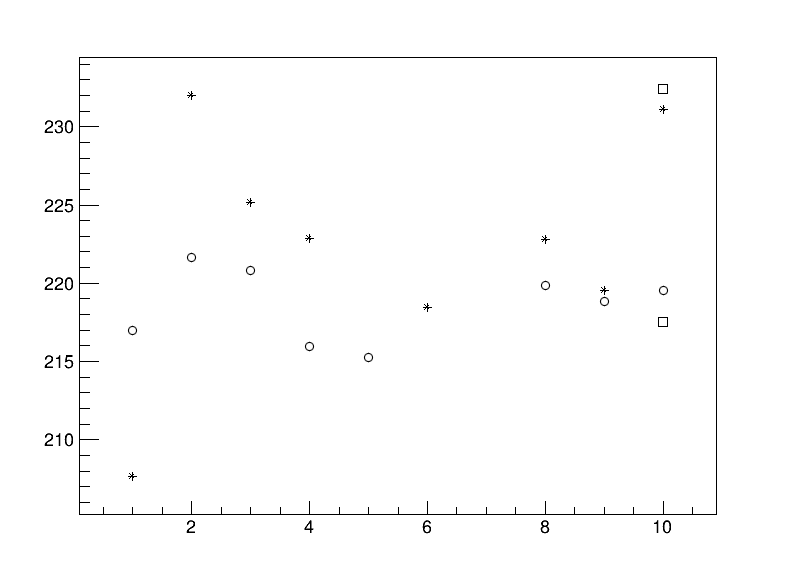

In [9]:
g['SR'].Draw('AP*')
g['SR_naked'].SetMarkerStyle(24)
g['SR_naked'].SetMarkerSize(1.2)
g['SR_naked'].Draw('PSAME')
g['SR_noglue'].SetMarkerStyle(25)
g['SR_noglue'].SetMarkerSize(1.2)
g['SR_noglue'].Draw('PSAME')
c1.Draw()

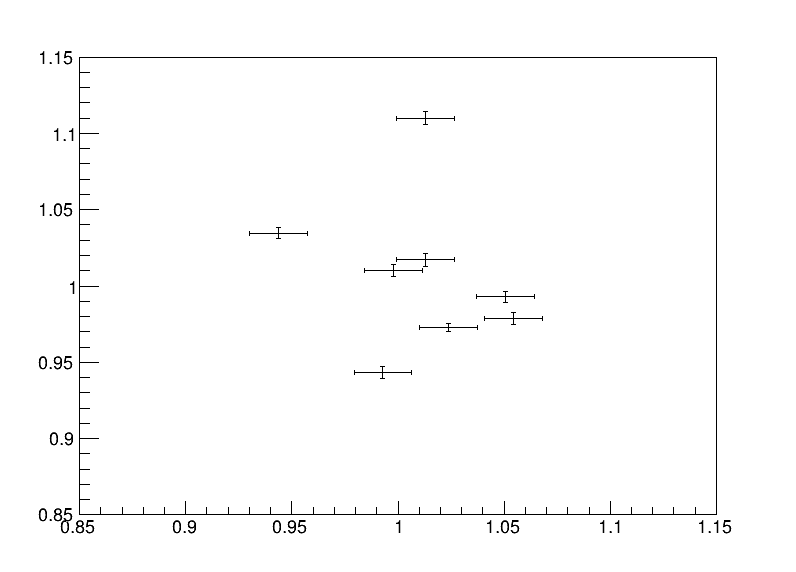

In [15]:
g['sigmaTvsSR'].Draw('AP')
g['sigmaTvsSR'].GetHistogram().GetXaxis().SetLimits(0.85,1.15)
g['sigmaTvsSR'].GetHistogram().GetXaxis().SetRangeUser(0.85,1.15)
g['sigmaTvsSR'].GetHistogram().GetYaxis().SetLimits(0.85,1.15)
g['sigmaTvsSR'].GetHistogram().GetYaxis().SetRangeUser(0.85,1.15)
#g['sigmaTvsSR_naked'].SetMarkerStyle(24)
#g['sigmaTvsSR_naked'].SetMarkerSize(1.2)
#g['sigmaTvsSR_naked'].Draw('PSAME')
#g['sigmaTvsSR_noglue'].SetMarkerStyle(25)
#g['sigmaTvsSR_noglue'].SetMarkerSize(1.2)
#g['sigmaTvsSR_noglue'].Draw('PSAME')
c1.Draw()

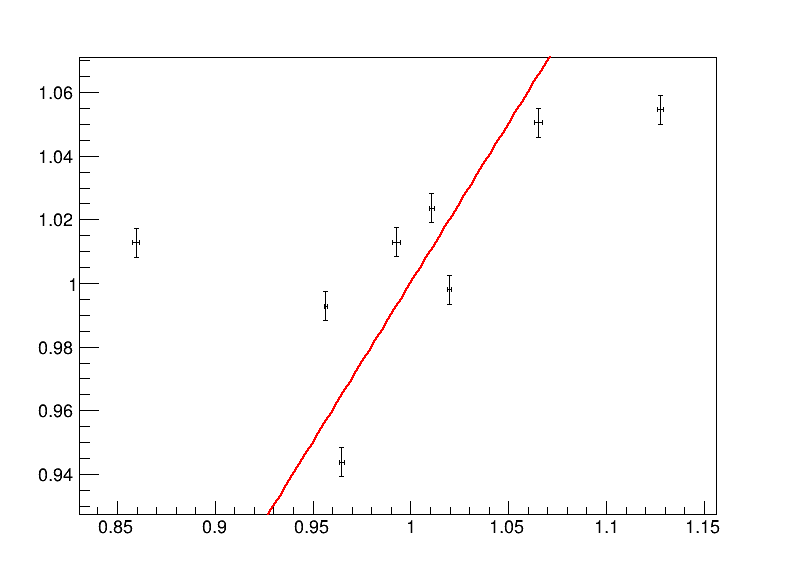

In [11]:
b=R.TF1('b','x',-10.,10)
g['SRvsLY'].Draw('AP')
b.Draw('SAME')
c1.Draw()

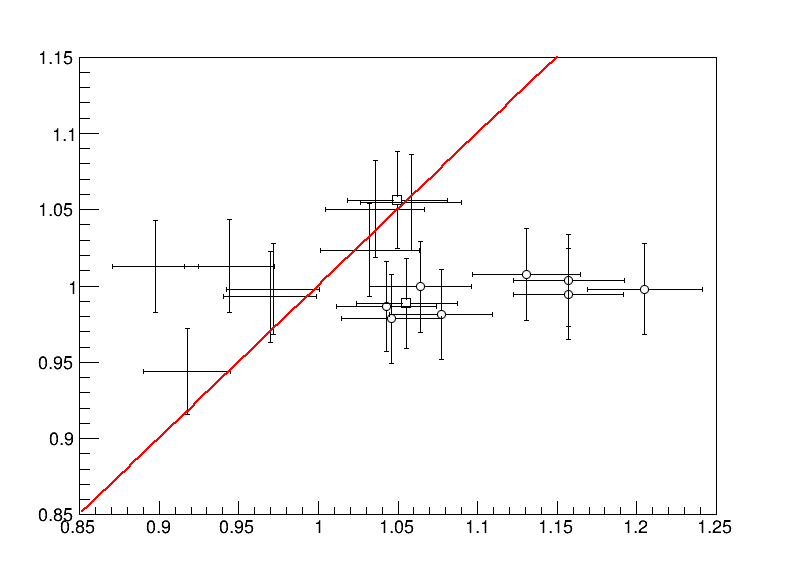

In [12]:
#SlewRate vs LY/tau
g['SRvsLYDT'].Draw('AP')
g['SRvsLYDT'].GetHistogram().GetXaxis().SetLimits(0.85,1.25)
g['SRvsLYDT'].GetHistogram().GetXaxis().SetRangeUser(0.85,1.25)
g['SRvsLYDT'].GetHistogram().GetYaxis().SetLimits(0.85,1.15)
g['SRvsLYDT'].GetHistogram().GetYaxis().SetRangeUser(0.85,1.15)
g['SRvsLYDT_naked'].SetMarkerStyle(24)
g['SRvsLYDT_naked'].SetMarkerSize(1.2)
g['SRvsLYDT_naked'].Draw('PSAME')
g['SRvsLYDT_noglue'].SetMarkerStyle(25)
g['SRvsLYDT_noglue'].SetMarkerSize(1.2)
g['SRvsLYDT_noglue'].Draw('PSAME')
b.Draw('SAME')
#g['SRvsLYDT'].Fit('pol1')
c1.Draw()

x[0]=1, y[0]=1.13666, ex[0]=0.5, ey[0]=0.04
x[1]=2, y[1]=1.06847, ex[1]=0.5, ey[1]=0.04
x[2]=3, y[2]=1.12111, ex[2]=0.5, ey[2]=0.04
x[3]=4, y[3]=1.14097, ex[3]=0.5, ey[3]=0.04
x[4]=8, y[4]=1.18539, ex[4]=0.5, ey[4]=0.04
x[5]=9, y[5]=1.19089, ex[5]=0.5, ey[5]=0.04
x[6]=10, y[6]=1.16341, ex[6]=0.5, ey[6]=0.04


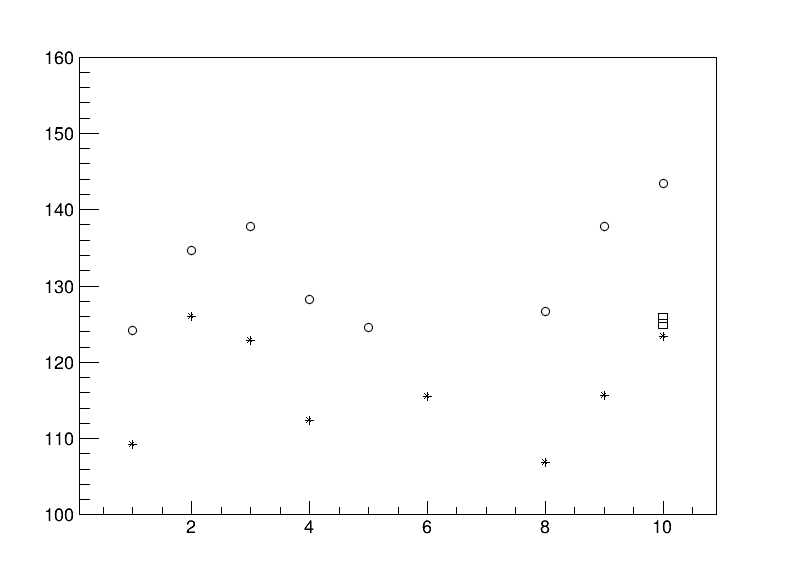

In [13]:
g['LYDT'].Draw('AP*')
g['LYDT'].GetHistogram().GetYaxis().SetLimits(100.,160.)
g['LYDT'].GetHistogram().GetYaxis().SetRangeUser(100.,160.)
g['LYDT_naked'].SetMarkerStyle(24)
g['LYDT_naked'].SetMarkerSize(1.2)
g['LYDT_naked'].Draw('PSAME')
g['LYDT_noglue'].SetMarkerStyle(25)
g['LYDT_noglue'].SetMarkerSize(1.2)
g['LYDT_noglue'].Draw('PSAME')
g['LYDT_ratio']=R.TGraphErrors()
ip=0
for i in range(g['LYDT'].GetN()):
    for i1 in range(g['LYDT_naked'].GetN()):
        if g['LYDT'].GetX()[i]==g['LYDT_naked'].GetX()[i1]:
            g['LYDT_ratio'].SetPoint(ip,g['LYDT'].GetX()[i],g['LYDT_naked'].GetY()[i]/g['LYDT'].GetY()[i])
            g['LYDT_ratio'].SetPointError(ip,0.5,0.04)
            ip+=1
            break

g['LYDT_ratio'].Print()
c1.Draw()

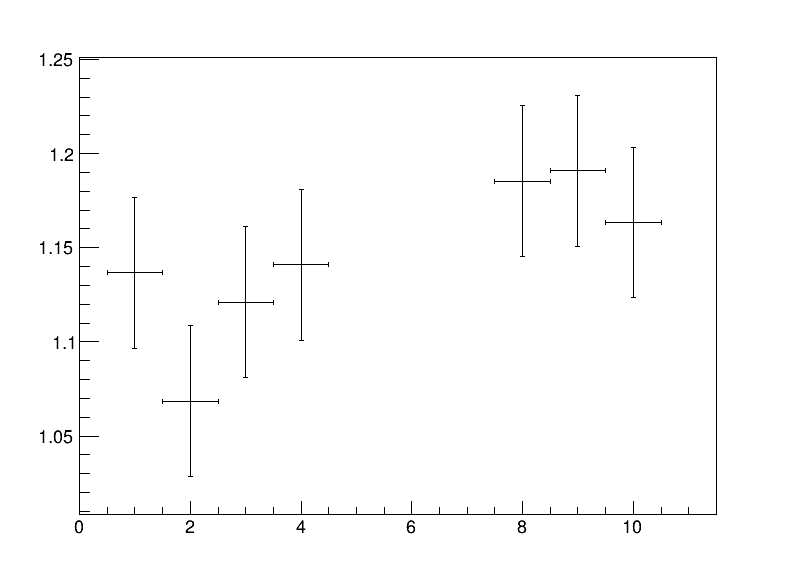

In [14]:
g['LYDT_ratio'].Draw('AP')
c1.Draw()